In [1]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#classificatin models
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
dt_5 = pd.read_csv(r'C:\Users\burq_\Downloads\DAAN 888-Design and Implementation of Analytics system\DAAN 888 Datasets\Final datasets\all cleaned-transformed datasets\Dataset-5a-cleaned-w-underlying-conditions-nulls-imputed.csv')

#EDA 

list(dt_5.columns)

['case_month',
 'res_state',
 'age_group',
 'sex',
 'race',
 'ethnicity',
 'exposure_yn',
 'current_status',
 'symptom_status',
 'hosp_yn',
 'icu_yn',
 'death_yn',
 'underlying_conditions_yn']

In [3]:
dt_5.shape

(29851450, 13)

In [4]:
dt_5.dtypes

case_month                  object
res_state                   object
age_group                   object
sex                         object
race                        object
ethnicity                   object
exposure_yn                 object
current_status              object
symptom_status              object
hosp_yn                     object
icu_yn                      object
death_yn                    object
underlying_conditions_yn    object
dtype: object

In [5]:
dt_5.isnull().sum()

case_month                  0
res_state                   0
age_group                   0
sex                         0
race                        0
ethnicity                   0
exposure_yn                 0
current_status              0
symptom_status              0
hosp_yn                     0
icu_yn                      0
death_yn                    0
underlying_conditions_yn    0
dtype: int64

In [6]:
# Dropping state and date cols

dt_5a = dt_5.drop(dt_5.columns[[0,1]], axis = 1)
list(dt_5a.columns)

['age_group',
 'sex',
 'race',
 'ethnicity',
 'exposure_yn',
 'current_status',
 'symptom_status',
 'hosp_yn',
 'icu_yn',
 'death_yn',
 'underlying_conditions_yn']

In [7]:
# converting the etnicity into dummy variables to check the trends against target variable

dt5a_dummy = pd.get_dummies(data= dt_5a, columns=['age_group', 'race', 'sex', 'ethnicity', 'exposure_yn','current_status', 'symptom_status', 'underlying_conditions_yn'])
list(dt5a_dummy.columns)

# Dropping all the 'not specified' columns from the dataset 5a_dummy

dt5a_dummy.drop(dt5a_dummy.columns[[7,14,18,21,23,28,31]], axis = 1, inplace = True)

dt_5b_dummy = pd.get_dummies(data = dt5a_dummy, columns = ['hosp_yn', 'icu_yn', 'death_yn'])
dt_5b_dummy.drop(dt_5b_dummy.columns[[24, 27,28,30]], axis=1, inplace = True)
list(dt_5b_dummy.columns)


['age_group_0 - 17 years',
 'age_group_18 to 49 years',
 'age_group_50 to 64 years',
 'age_group_65+ years',
 'race_American Indian/Alaska Native',
 'race_Asian',
 'race_Black',
 'race_Multiple/Other',
 'race_Native Hawaiian/Other Pacific Islander',
 'race_White',
 'sex_Female',
 'sex_Male',
 'sex_Other',
 'ethnicity_Hispanic/Latino',
 'ethnicity_Non-Hispanic/Latino',
 'exposure_yn_Yes',
 'current_status_Laboratory-confirmed case',
 'current_status_Probable Case',
 'symptom_status_Asymptomatic',
 'symptom_status_Symptomatic',
 'underlying_conditions_yn_No',
 'underlying_conditions_yn_Yes',
 'hosp_yn_No',
 'hosp_yn_Yes',
 'icu_yn_No',
 'icu_yn_Yes',
 'death_yn_Yes']

In [8]:
dt_5b_dummy.dtypes

age_group_0 - 17 years                         uint8
age_group_18 to 49 years                       uint8
age_group_50 to 64 years                       uint8
age_group_65+ years                            uint8
race_American Indian/Alaska Native             uint8
race_Asian                                     uint8
race_Black                                     uint8
race_Multiple/Other                            uint8
race_Native Hawaiian/Other Pacific Islander    uint8
race_White                                     uint8
sex_Female                                     uint8
sex_Male                                       uint8
sex_Other                                      uint8
ethnicity_Hispanic/Latino                      uint8
ethnicity_Non-Hispanic/Latino                  uint8
exposure_yn_Yes                                uint8
current_status_Laboratory-confirmed case       uint8
current_status_Probable Case                   uint8
symptom_status_Asymptomatic                   

In [9]:
# separating into input and output cols

X = dt_5b_dummy.iloc[:, :-1]
list(X.columns)

['age_group_0 - 17 years',
 'age_group_18 to 49 years',
 'age_group_50 to 64 years',
 'age_group_65+ years',
 'race_American Indian/Alaska Native',
 'race_Asian',
 'race_Black',
 'race_Multiple/Other',
 'race_Native Hawaiian/Other Pacific Islander',
 'race_White',
 'sex_Female',
 'sex_Male',
 'sex_Other',
 'ethnicity_Hispanic/Latino',
 'ethnicity_Non-Hispanic/Latino',
 'exposure_yn_Yes',
 'current_status_Laboratory-confirmed case',
 'current_status_Probable Case',
 'symptom_status_Asymptomatic',
 'symptom_status_Symptomatic',
 'underlying_conditions_yn_No',
 'underlying_conditions_yn_Yes',
 'hosp_yn_No',
 'hosp_yn_Yes',
 'icu_yn_No',
 'icu_yn_Yes']

In [10]:
y = dt_5b_dummy.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: death_yn_Yes, dtype: uint8

In [13]:
# splitting data into test and train 

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state=1)

print("test and train split")
print("train X.shape:")
print(X_train.shape)
print("train y.shape")
print(y_train.shape)
print("")
print("Number of 0s, 1s in y.train")
print(y_train.value_counts())
print("")
print("test X.shape")
print(X_test.shape)
print("test y.shape")
print(y_test.shape)


test and train split
train X.shape:
(20896015, 26)
train y.shape
(20896015,)

Number of 0s, 1s in y.train
0    20691965
1      204050
Name: death_yn_Yes, dtype: int64

test X.shape
(8955435, 26)
test y.shape
(8955435,)


In [14]:
# XGBoost Model

model = XGBClassifier()

model.fit(X_train, y_train)
print(model)

[18:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


In [16]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.05%


In [17]:
feature_importance = pd.DataFrame({'feature':X.columns,
              'importance':model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
3,age_group_65+ years,0.591670
23,hosp_yn_Yes,0.169017
1,age_group_18 to 49 years,0.041325
0,age_group_0 - 17 years,0.038345
25,icu_yn_Yes,0.021992
2,age_group_50 to 64 years,0.019093
14,ethnicity_Non-Hispanic/Latino,0.018356
13,ethnicity_Hispanic/Latino,0.015589
19,symptom_status_Symptomatic,0.012298
9,race_White,0.009399


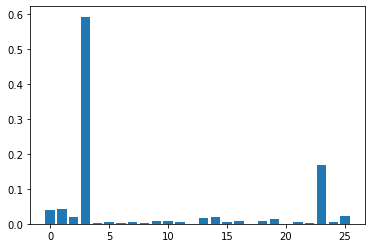

In [22]:
importance = model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance, label=X.columns)
plt.show()

In [23]:
# removing all the predictive columns except the race to check which race is at a higher risk

Xa= dt_5b_dummy.iloc[:, 4:10]
list(Xa.columns)


['race_American Indian/Alaska Native',
 'race_Asian',
 'race_Black',
 'race_Multiple/Other',
 'race_Native Hawaiian/Other Pacific Islander',
 'race_White']

In [25]:
# splitting data into test and train 

Xa_train, Xa_test, y_train, y_test = train_test_split(
        Xa, y, test_size = 0.3, random_state=1)

print("test and train split")
print("train Xa.shape:")
print(Xa_train.shape)
print("train y.shape")
print(y_train.shape)
print("")
print("Number of 0s, 1s in y.train")
print(y_train.value_counts())
print("")
print("test Xa.shape")
print(Xa_test.shape)
print("test y.shape")
print(y_test.shape)

test and train split
train Xa.shape:
(20896015, 6)
train y.shape
(20896015,)

Number of 0s, 1s in y.train
0    20691965
1      204050
Name: death_yn_Yes, dtype: int64

test Xa.shape
(8955435, 6)
test y.shape
(8955435,)


In [26]:
model_a = XGBClassifier()

model_a.fit(Xa_train, y_train)
print(model_a)

[19:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


In [28]:
# make predictions for test data
y_pred1 = model_a.predict(Xa_test)
predictions1 = [round(value) for value in y_pred1]
# evaluate predictions
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 99.03%


In [29]:
feature_importance1 = pd.DataFrame({'feature':Xa.columns,
              'importance':model_a.feature_importances_})
feature_importance1.sort_values(by='importance', ascending=False)

,feature,importance
5,race_White,0.723205
2,race_Black,0.174928
1,race_Asian,0.099220
4,race_Native Hawaiian/Other Pacific Islander,0.002119
0,race_American Indian/Alaska Native,0.000295
3,race_Multiple/Other,0.000233


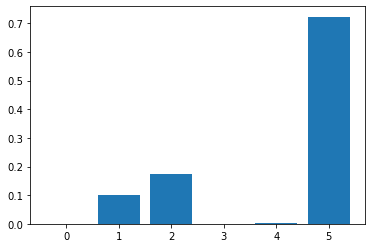

In [30]:
importance1 = model_a.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance1))], importance1, label=Xa.columns)
plt.show()